<img src="https://farm66.staticflickr.com/65535/49055715328_092031af74_o.png"  width="150" />

<font size="5"> Photometric redshifts with Dense Network
    
<font size="2">
    
This notebook was adapted from the one developed by Gabriel Teixeira for the Big Data and Astroinformatics class - prof. Clécio R. Bom
<a href="www.clearnightsrthebest.com">clearnightsrthebest.com</a>
    
**Contact:** debom@cbpf.br</font>

<font size="2">

Please do not remove this disclaimer.</font>

In [1]:
from astropy.io import fits
import os
import numpy as np
from astropy.table import Table
import matplotlib.pyplot as plt
import pandas as pd

def open_fits_catalog(fits_file):
    hdu_list=fits.open(fits_file, ignore_missing_end=True)
    #print hdu_list
    hdu = hdu_list[1]    # table extensions can't be the first extension, so there's a dummy image extension at 0
    #print hdu.header
    cat_table = Table(hdu.data)
    cols=hdu.columns
    return cat_table, cols

In [2]:
dados_dir = './'
data_file = os.path.join(dados_dir, 'specz_catalog_XIIIecbpf.fits')
data, _ = open_fits_catalog(data_file)

In [3]:
data

<Table length=175921>
    ra        dec      class      z          zErr     ... petroMag_r petroMagErr_r petroMag_i petroMagErr_i
 float64    float64     str6   float64     float64    ...    str8        str12        str8        str12    
--------- ------------ ------ ---------- ------------ ... ---------- ------------- ---------- -------------
146.62282  -0.95138526 GALAXY  0.3711277  6.93721e-05 ...   18.62304  0.03089815     18.05202  0.03665525  
146.59272  -0.76025604 GALAXY 0.06495924 9.294928e-06 ...   16.91567  0.01007535     16.50206  0.01019981  
 146.9108 -0.074559356 GALAXY  0.2422717 8.594267e-05 ...   18.03267  0.03387981     17.43746  0.04512536  
146.44831  -0.71339967 GALAXY  0.1146981  7.54594e-06 ...   17.451    0.009233744    17.02182  0.008778921 
146.78847  -0.31065752 GALAXY 0.05656198 1.513238e-05 ...   18.14503  0.03382286     17.86618  0.03925543  
146.09369  -0.79308773 GALAXY 0.06758517 1.316565e-05 ...   15.85149  0.005180169    15.43335  0.004949708 
146.09369  -0.79308773 GALAXY 0.06762055   1.4237e-05 ...   15.85149  0.005180169    15.43335  0.004949708 
146.14358  -0.74164105 GALAXY  0.2038898  3.32915e-05 ...   16.68983  0.01563277     16.16855  0.01662161  
 146.7517  -0.40839151 GALAXY 0.03580831  5.25862e-06 ...   15.98186  0.005794456    15.66012  0.005502901 
      ...          ...    ...        ...          ... ...        ...           ...        ...           ...
16.156082   -0.4404711 GALAXY  0.1154022 7.216163e-06 ...   17.3282   0.01042059     16.91579  0.01073678  
16.066216  -0.35953677 GALAXY 0.04948532 2.684234e-05 ...   17.62843  0.009459293    17.28281  0.009909552 
16.063257    -1.114314 GALAXY 0.01798435 9.046286e-06 ...   14.7701   0.004130061    14.40654  0.00436022  
15.844699  -0.67906213 GALAXY  0.2059941 6.532551e-06 ...   18.78613  0.01499067     18.41356  0.01536485  
15.770648  -0.37314851 GALAXY  0.0648139 3.183422e-05 ...   17.76802  0.03448401     17.40179  0.04046607  
16.005106     -0.85595 GALAXY 0.06507264 7.434764e-06 ...   16.86439  0.008551153    16.60081  0.01340905  
15.651509  -0.63736558 GALAXY  0.1913125 3.538778e-05 ...   17.65709  0.01682307     17.13594  0.01566291  
15.866415   -1.1590945 GALAXY  0.1372756 2.340026e-05 ...   17.00707  0.009945687    16.62113  0.01116389  
15.624099  -0.81344055 GALAXY  0.2375021 4.261418e-05 ...   17.38507  0.02042167     16.88052  0.01921708  
15.332944  -0.62459892 QSO     0.1909389 8.028026e-05 ...   18.93796  0.0268109      18.48788  0.0236895

In [4]:
mags = ['petroMag_'+band for band in 'ugri']

key_list = mags 

In [5]:
# outliers
data = data.to_pandas()
for i in range(0, len(key_list)):
    idx = []
    for j in range(0, len(data[key_list[i]])):
        if data[key_list[i]][j] == 'null    ':
            idx.append(j)
        elif data[key_list[i]][j] == '-9999   ':
            idx.append(j)
            

    data.drop(idx, inplace=True)
    data.reset_index(inplace=True, drop=True)
    data.astype({key_list[i]: 'float'})
    
# retirando z negativo
idx = []
for i in range(0, len(data['z'])):
    if data['z'][i] < 0.001:
        idx.append(i)
        
data.drop(idx, inplace=True)
data.reset_index(inplace=True, drop=True)
data.astype({'z': 'float'})
        
data = Table.from_pandas(data)

ok
ok
ok
ok


<function matplotlib.pyplot.show(close=None, block=None)>

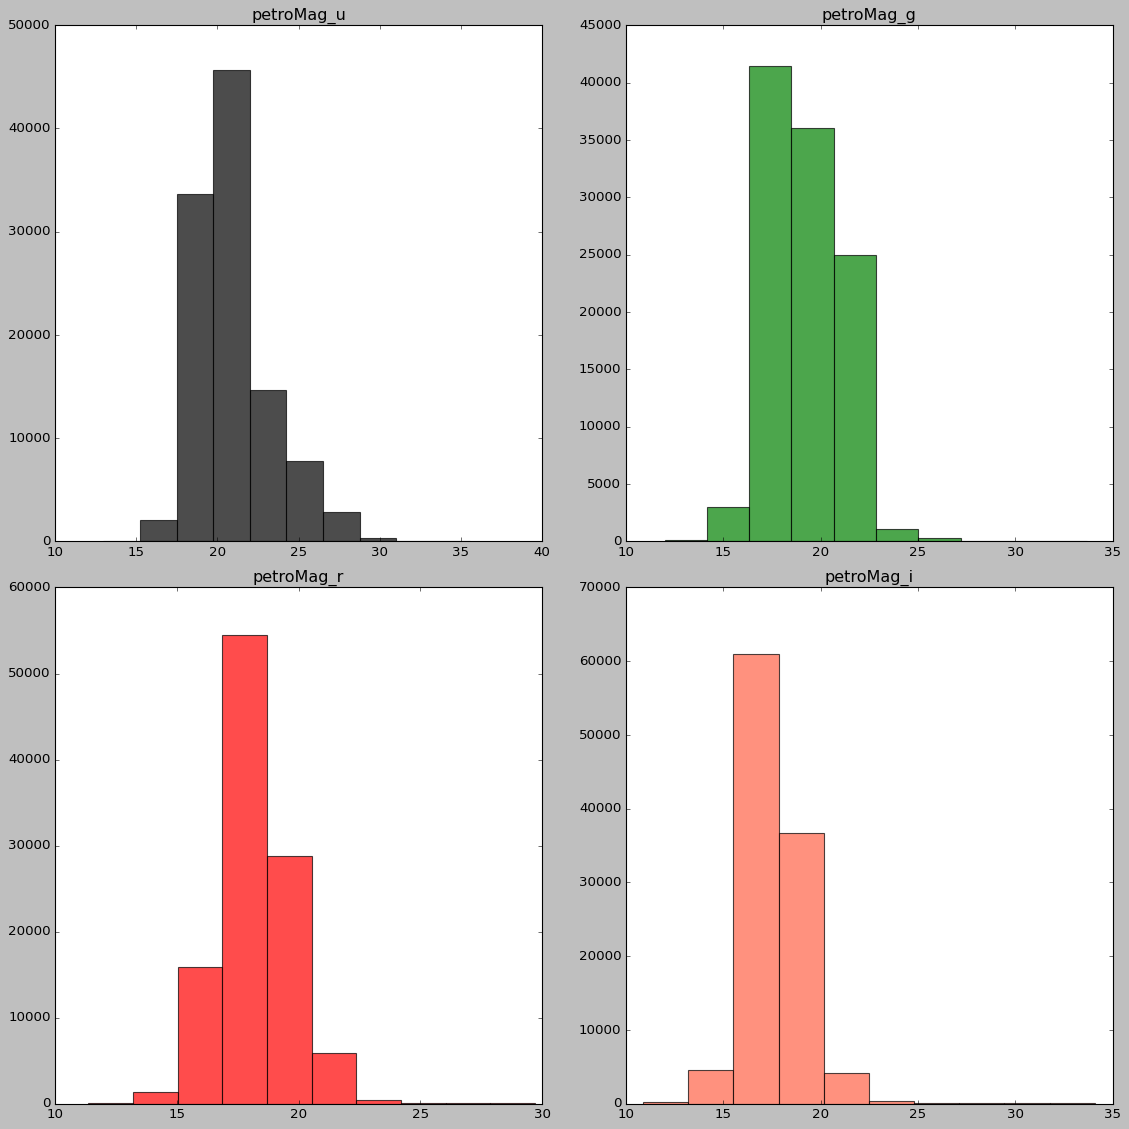

In [6]:
### MAG PLOTS

color_list = ['black', 'green', 'red', 'tomato', 'palevioletred']
hor = 2
ver = 2

plt.style.use('classic')

fig = plt.figure(figsize=(14, 14), constrained_layout=True)
gs = fig.add_gridspec(ver, hor, left=0.05, right=0.5, wspace=0.05)

i=0
#binsize=0.2
#def binarange(arr):
    #print(float(max(arr))+1)
    #return np.arange(float(min(arr)), float(max(arr))+binsize, binsize)


for v in range(ver):
    for h in range(hor):
        print('ok')
        if v==2:
            ax = fig.add_subplot(gs[v, 0])
            #bins = binarange(data.field(key_list[i]))
            ax.hist(np.array(data.field(key_list[i]), dtype=float), color=color_list[i], alpha=0.7)
            ax.set_title(key_list[i])
            
            ax = fig.add_subplot(gs[v, 1])
            for c, key in enumerate(key_list):
                #bins = binarange(data.field(key))
                ax.hist(np.array(data.field(key_list[i]), dtype=float), color=color_list[c], alpha=1, label=key, histtype='step')
            ax.set_title("All Mags")
            plt.legend()
            
            break
            i+=1
        
        
        mags = ['petroMag_'+band for band in 'ugri']
        
        ax = fig.add_subplot(gs[v, h])
        #bins = binarange(data.field(key_list[i]))
        ax.hist(np.array(data.field(key_list[i]), dtype=float), color=color_list[i], alpha=0.7)
        ax.set_title(key_list[i])
        i+=1

plt.show

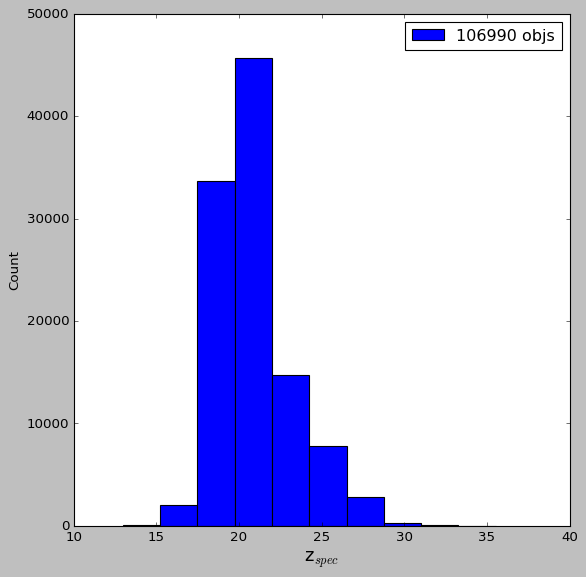

In [7]:
#ZSPEC PLOTS

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot()
ax.hist(np.array(data.field('petroMag_u'), dtype=float), color='blue', label=f'{len(data)} objs')
ax.set_xlabel('z$_{spec}$', fontsize=16)
ax.set_ylabel('Count')
plt.legend()

In [8]:
data = data.to_pandas()
cols = data.columns
for i in range(0, len(cols)):
    if cols[i] != 'class':
        data[cols[i]] = pd.to_numeric(data[cols[i]])
data.head()

data = Table.from_pandas(data)

In [9]:
#preprocessing

from sklearn.preprocessing import MinMaxScaler
np.random.seed(42)

train_percentual = 7/10
train_cut = np.random.uniform(0, 1, len(data)) < train_percentual
train_data = data[train_cut]

test_val_data = data[~train_cut]

test_percentual = 2/3
test_cut = np.random.uniform(0, 1, len(test_val_data)) < test_percentual

test_data = test_val_data[test_cut]
val_data = test_val_data[~test_cut]

print(f'Train Percent = {len(train_data)/len(data)*100:.2f}%')
print(f'Test Percent = {len(test_data)/len(data)*100:.2f}%')
print(f'Val Percent = {len(val_data)/len(data)*100:.2f}%')

#embaralhando os dados

train_shuffler = np.random.choice(len(train_data), len(train_data), replace=False)
train_data = train_data[train_shuffler]

test_shuffler = np.random.choice(len(test_data), len(test_data), replace=False)
test_data = test_data[test_shuffler]

val_shuffler = np.random.choice(len(val_data), len(val_data), replace=False)
val_data = val_data[val_shuffler]


x_train = np.array([train_data.field(mag) for mag in mags]).T
y_train = np.array(train_data.field('z'))

x_test = np.array([test_data.field(mag) for mag in mags]).T
y_test = np.array(test_data.field('z'))

x_val = np.array([val_data.field(mag) for mag in mags]).T
y_val = np.array(val_data.field('z'))

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

# np.max(x_test[:, 1])

Train Percent = 70.12%
Test Percent = 19.93%
Val Percent = 9.95%


In [10]:
import tensorflow.keras as keras
# os.environ['CUDA_DEVICE_ORDER'] = 'PCI_BUS_ID'
# os.environ['CUDA_VISIBLE_DEVICES'] = "1"


def build_model(input_shape, nb_classes=1):
    input_layer = keras.layers.Input(input_shape)

    layer_1 = keras.layers.Dense(512, activation='relu')(input_layer)
    layer_1= keras.layers.Dropout(rate=0.2)(layer_1)

    layer_2 = keras.layers.Dense(256, activation='relu')(layer_1)
    layer_2 = keras.layers.Dropout(rate=0.2)(layer_2)

    layer_3 = keras.layers.Dense(128, activation='relu')(layer_2)
    layer_3 = keras.layers.Dropout(rate=0.2)(layer_3)

    output_layer = keras.layers.Dense(units=nb_classes,activation='linear')(layer_2)


    model = keras.models.Model(inputs=input_layer, outputs=output_layer)
    return model

regressor = build_model(x_train.shape[1:])
regressor.compile(loss='mse', optimizer=keras.optimizers.Nadam(), metrics=['accuracy'])


batch_size = 128
epochs = 20

history = regressor.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, 
                     verbose=1, validation_data=(x_val,y_val))

preds = regressor.predict(x_test)

2021-11-28 15:35:51.792054: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-28 15:35:51.792102: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-11-28 15:35:54.139759: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-28 15:35:54.139832: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-28 15:35:54.139873: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-0SVSQGR): /proc/driver/nvidia/version does not exist
2021-11-28 15:35:54.140194: I tensorflow/core/platform/cpu_fe

Epoch 1/20
587/587 [==============================] - 3s 4ms/step - loss: 0.0075 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 0.0000e+00
Epoch 2/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0055 - accuracy: 0.0000e+00 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 3/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0050 - accuracy: 0.0000e+00 - val_loss: 0.0047 - val_accuracy: 0.0000e+00
Epoch 4/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0047 - accuracy: 0.0000e+00 - val_loss: 0.0063 - val_accuracy: 0.0000e+00
Epoch 5/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0151 - val_accuracy: 0.0000e+00
Epoch 6/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0046 - accuracy: 0.0000e+00 - val_loss: 0.0043 - val_accuracy: 0.0000e+00
Epoch 7/20
587/587 [==============================] - 2s 4ms/step - loss: 0.0044 - accuracy: 0.0000e

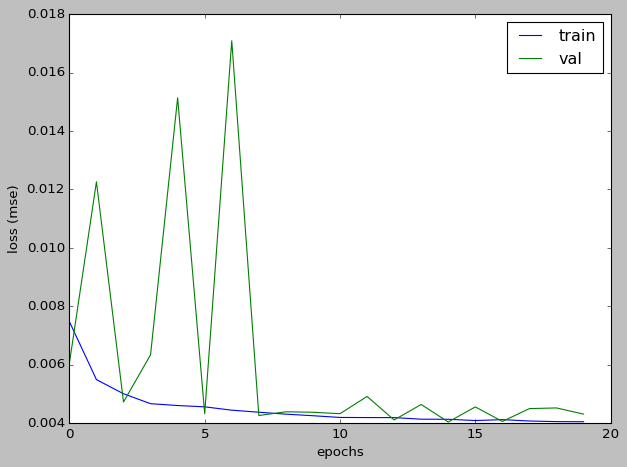

In [11]:
# TRAINING PLOTS

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('epochs')
plt.ylabel('loss (mse)')
plt.legend()
plt.tight_layout()

In [12]:
### CALCULO DAS MÉTRICAS E PLOTS
def get_zstatistic(z,zspec):
    
    deltaz=z-zspec
    mean_bias=np.mean(deltaz)


    p16=np.percentile(deltaz,15.85)
    p84=np.percentile(deltaz,84.05)
    sigma68=0.5*(p84-p16)
    median_bias=np.percentile(deltaz,50)
    return mean_bias,median_bias,sigma68
    

def redshift_plot(z, zspec):
    
    plt.style.use('default')
    
    fig = plt.figure(figsize=(10, 8))
    
    mean_bias,median_bias,sigma68=get_zstatistic(z, zspec)


    text="\n $\sigma_{68}$: $"+str(round(sigma68,3))+"$"
    text+="\n Mean Bias: $"+str(round(mean_bias,3))+"$"
    text+="\n Median Bias: $"+str(round(median_bias,3))+"$"
    ax = fig.add_subplot()
    
    #dispersão entre photo-z e spec-z
    ax.scatter(np.array(zspec), np.array(z),
                       alpha = 0.5,
                       s=8,marker='o')
    
    #reta x = y
    reta = [0, max([max(zspec), max(z)])]
    ax.plot(reta, reta,
              ls='dashed', color='black', lw=0.5)
    
    #limites e legendas
    #ax.set_ylim(min(z),max(z))
    #ax.set_xlim(0,max(zspec))
    ax.set_ylabel("$z_{phot}$", fontsize=15)
    ax.set_xlabel("$z_{spec}$", fontsize=15)
    ax.text(0.7*max(zspec), .2*max(z), text, va="top", fontsize=12)
    
    plt.show()


In [13]:
y_test[:10000]

array([0.07702647, 0.2613639 , 0.08100747, ..., 0.04958658, 0.1454454 ,
       0.1012514 ])

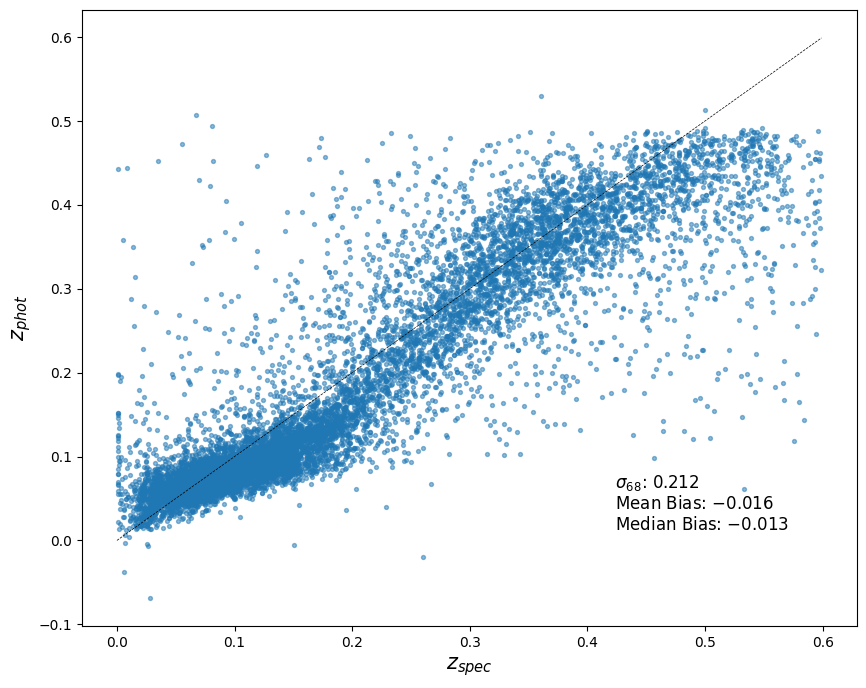

In [14]:
redshift_plot(preds[:10000], y_test[:10000])

(array([1177., 2548., 1688.,  939.,  819.,  931.,  823.,  531.,  360.,
         184.]),
 array([0.001006 , 0.0608069, 0.1206078, 0.1804087, 0.2402096, 0.3000105,
        0.3598114, 0.4196123, 0.4794132, 0.5392141, 0.599015 ]),
 <BarContainer object of 10 artists>)

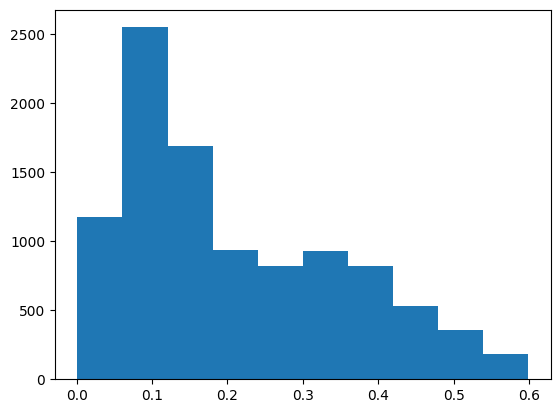

In [15]:
plt.hist(y_test[:10000])

In [16]:
min(y_test[:10000])

0.001006002